# Load data

In [1]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')

weight = np.cos(np.deg2rad(ds_sat_EOFs_MC['lat']))
weight = xr.where(weight < 0, 0, weight)

ds_sat_EOFs_MC['weight']=weight

# load PCs
import pandas as pd
PCs_df=pd.read_csv(data_dir+'/PCs_LGMR_11to23.csv')
PCs = PCs_df[['PC1', 'PC2']].to_numpy()
# load variance_explained from numpy array
variance_explained = np.load('data_fig1/variance_explained.npy')


# read the aic_values_dict
import pickle
with open('data_fig1/aic_values_dict.pkl', 'rb') as f:
    aic_values_dict = pickle.load(f)

# read results_sklearn from a pickle file
import pickle
with open('data_fig1/results_sklearn.pkl', 'rb') as f:
    results_sklearn = pickle.load(f)

# only take the first 10 elements in the results_sklearn
results_sklearn = results_sklearn[:10]

In [57]:
results_sklearn

[{'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}]

In [51]:
results_sklearn[0]['labels'].shape

(13824,)

Text(0.5, 0, 'Class Label')

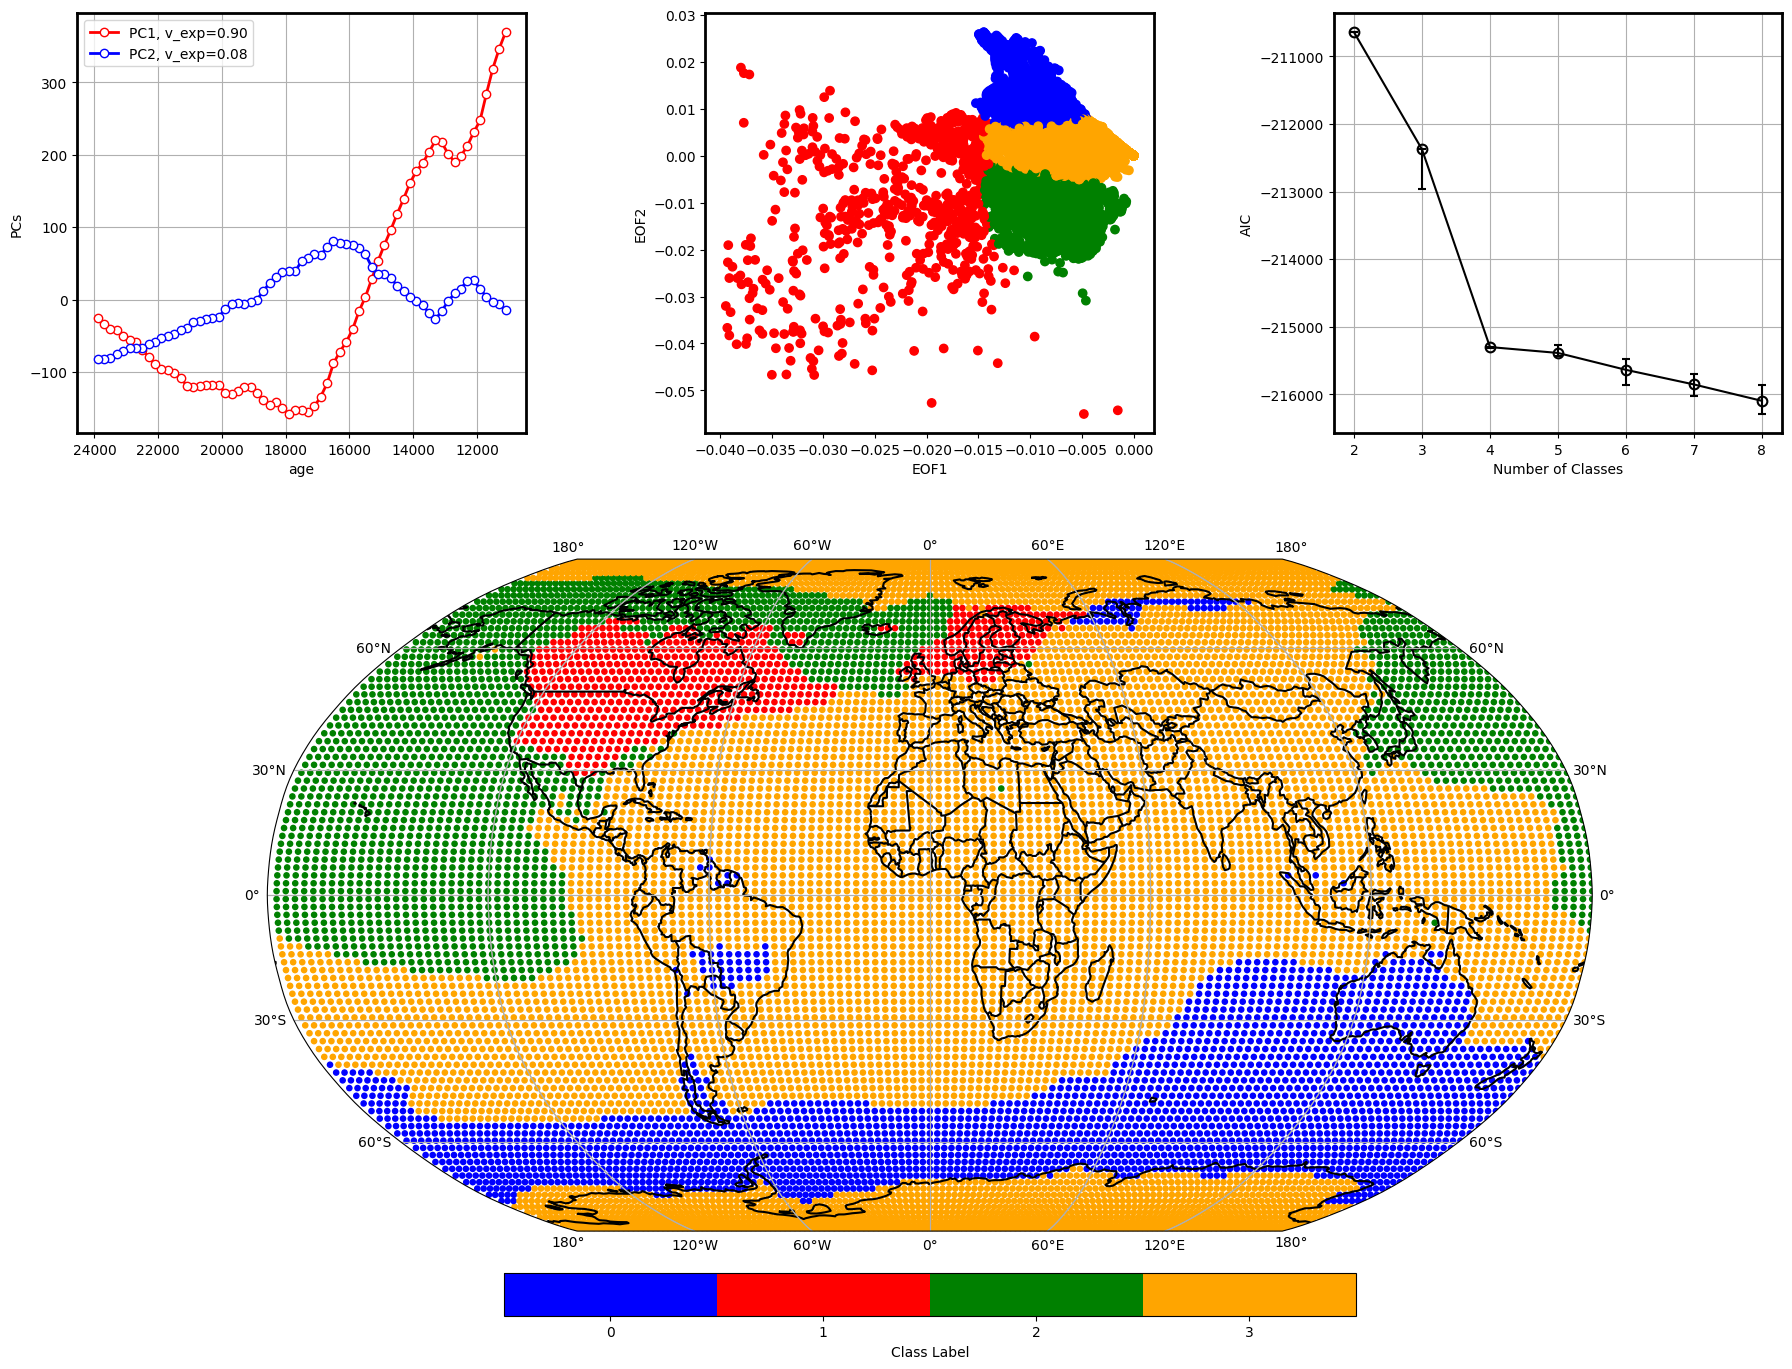

In [3]:

# plot the PCs against the age
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cartopy.crs as ccrs


fig = plt.figure(figsize=(22, 18))
spec = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[1, 2],wspace=0.4)

# Create your subplots
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, :], projection=ccrs.Robinson())  # Spans all columns of the second row







    



ax1.plot(ds_sat_EOFs_MC['age'], -1*PCs[:, 0], color='r',linewidth=2,marker='o',markerfacecolor='white', label='PC1, v_exp={:.2f}'.format(variance_explained[0]))
ax1.plot(ds_sat_EOFs_MC['age'], PCs[:, 1], color='b',linewidth=2,marker='o',markerfacecolor='white', label='PC2, v_exp={:.2f}'.format(variance_explained[1]))

# set line width of the box
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)


# reverse the x-axis
ax1.invert_xaxis()

ax1.set_xlabel('age')
ax1.set_ylabel('PCs')
ax1.legend()
ax1.grid(True)













colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
cmap = mcolors.ListedColormap(colors[0:len(np.unique(ds_sat_EOFs_MC['class_label']))])

scatter = ax2.scatter(ds_sat_EOFs_MC['EOF1'], ds_sat_EOFs_MC['EOF2'], c=ds_sat_EOFs_MC['class_label'], cmap=cmap)
# axes[1, 0].set_title("EOF1 vs EOF2")
ax2.set_xlabel("EOF1")
ax2.set_ylabel("EOF2")
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    



n_components_range = range(2, 9)  # 2 to 8 inclusive
# Compute means, lower and upper limits
median = [np.median(aic_values_dict[key]) for key in n_components_range]
lower_limits = [np.percentile(aic_values_dict[key], 5) for key in n_components_range]
upper_limits = [np.percentile(aic_values_dict[key], 95) for key in n_components_range]

# Differences from the mean for error bars
lower_errors = [mean - lower for mean, lower in zip(median, lower_limits)]
upper_errors = [upper - mean for mean, upper in zip(median, upper_limits)]

# AIC Plot
# ax2.errorbar(n_components_range, means, yerr=[lower_errors, upper_errors], 
#                capsize=5, fmt='-o', label='Mean AIC with 5% and 95% quantiles of AIC')
# AIC Plot
line, caplines, barlinecols = ax3.errorbar(n_components_range, median, 
               yerr=[lower_errors, upper_errors], capsize=3, color='black',
               fmt='-o', markerfacecolor='none', markersize=7,markeredgewidth=1.5, label='Mean AIC with 5% and 95% quantiles of AIC')  # add markerfacecolor='none'

ax3.set_xlabel('Number of Classes')
ax3.set_ylabel('AIC')
# ax2.legend()
ax3.grid(True)
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)










sat_label = ds_sat_EOFs_MC['class_label']

colors = [
    (0.42, 0.67, 0.84),  # Soft blue
    (0.95, 0.89, 0.6),   # Mellow yellow
    (0.5, 0.76, 0.56),   # Soothing green
    (1,1,1)              # White
]

ax4.add_feature(cfeature.COASTLINE, linewidth=1.5, edgecolor='black')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')

# Generating meshgrid for lon-lat
lon, lat = np.meshgrid(ds_sat_EOFs_MC.lon, ds_sat_EOFs_MC.lat)

# Flattening the lon-lat and the label data for scatter plotting
lon_flat = lon.flatten()
lat_flat = lat.flatten()
labels_flat = sat_label.values.flatten()

# Using a scatter plot instead of pcolormesh
sc = ax4.scatter(lon_flat, lat_flat, c=labels_flat, cmap=cmap, transform=ccrs.PlateCarree(), alpha=1, s=14)  # s is the size of the scatter point

gl = ax4.gridlines(draw_labels=True)

ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

bounds = np.arange(len(np.unique(sat_label))+1) - 0.5
ticks = np.arange(len(np.unique(sat_label)))
cbar = fig.colorbar(sc, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.5)
cbar.ax.set_xlabel('Class Label')

########################################################################################################

# sat_label = ds_sat_EOFs_MC['class_label']

# # colors = ['blue', 'red', 'green', 'gray', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# # colors=[(1,0.2,0.2), 'gold', '#2ca02c', (1,1,1)]
# colors = [
#     (0.42, 0.67, 0.84),  # Soft blue
#     (0.95, 0.89, 0.6),   # Mellow yellow
#     (0.5, 0.76, 0.56),   # Soothing green
#     (1,1,1)   # Gentle red
# ]

# ax4.add_feature(cfeature.COASTLINE, linewidth=1.5, edgecolor='black')
# ax4.gridlines()
# # add borders
# ax4.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')

# cmap = mcolors.ListedColormap(colors[0:len(np.unique(sat_label))])
# # im = axes[1, 1].pcolormesh(ds_sat_EOFs_MC.lon, ds_sat_EOFs_MC.lat, sat_label, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')
# im = ax4.pcolormesh(ds_sat_EOFs_MC.lon, ds_sat_EOFs_MC.lat, sat_label, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto',alpha=1)
# # im = ax4.pcolormesh(ds_sat_EOFs_MC.lon, ds_sat_EOFs_MC.lat, results_sklearn[0]['labels'].reshape(96,144), transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')

# # num_iterations = len(results_sklearn)

# # # Define an alpha value depending on the number of iterations. This can be adjusted as per requirement.
# # alpha_val = 0.1

# # for result in results_sklearn:
# #     labels = result['labels'].reshape(96,144)
# #     im = ax4.pcolormesh(ds_sat_EOFs_MC.lon, ds_sat_EOFs_MC.lat, labels, 
# #                                transform=ccrs.PlateCarree(), cmap=cmap, shading='auto', alpha=alpha_val)


# # axes[1, 1].set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
# # axes[1, 1].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# gl = ax4.gridlines(draw_labels=True)

# ax4.set_xlabel('Longitude')
# ax4.set_ylabel('Latitude')
# # ax4.set_title('Spatial distribution of class labels')

# bounds = np.arange(len(np.unique(sat_label))+1) -0.5
# ticks = np.arange(len(np.unique(sat_label)))
# cbar = fig.colorbar(im, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.5)
# # cbar.ax.set_yticklabels(np.unique(sat_label))
# cbar.ax.set_xlabel('Class Label')

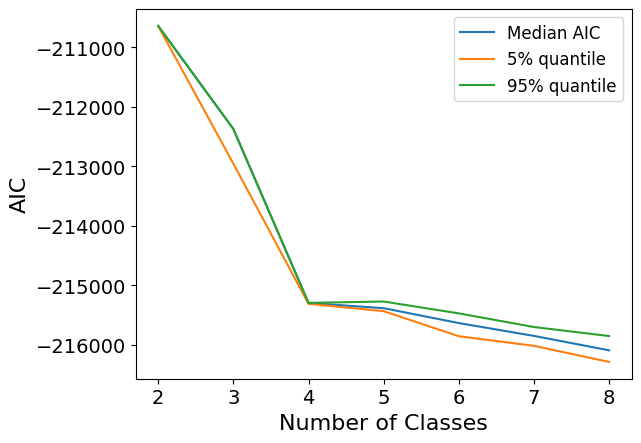

In [41]:
# plot median, lower_limits and upper_limits of AIC in a new plot
fig, ax = plt.subplots()
ax.plot(n_components_range, median, label='Median AIC')
ax.plot(n_components_range, lower_limits, label='5% quantile')
ax.plot(n_components_range, upper_limits, label='95% quantile')
ax.set_xlabel('Number of Classes')
ax.set_ylabel('AIC')
ax.legend()